In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [58]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [59]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [60]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [61]:
train_features = train.drop(['SalePrice','Id'],axis=1)
test = test.drop(['Id'],axis=1)

In [62]:
train_features.shape

(1460, 79)

In [63]:
test.shape

(1459, 79)

# Deal with missing values

In [64]:
def DropMissingValue(data:pd,threshold = 0.3) -> pd: # drop missing value that exceed threshold of number of observations
    df_null = data.isnull().sum()
    null_index = df_null[df_null >= threshold*data.shape[0]].index
    data = data.drop(null_index,axis=1)
    return data

In [65]:
train_new = DropMissingValue(train_features)
test_new = DropMissingValue(test)

In [66]:
train_new.columns == test_new.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

# Fill nan with mean for float numbers except for year,fill nan with mode for categorical values

In [67]:
train_null = train_new.isnull().sum().sort_values(ascending=False) != 0
train_null_idx = train_null[train_null].index

In [68]:
test_null = test_new.isnull().sum().sort_values(ascending=False) != 0
test_null_idx = test_null[test_null].index

In [69]:
train_new[train_null_idx].dtypes

LotFrontage     float64
GarageFinish     object
GarageType       object
GarageCond       object
GarageQual       object
GarageYrBlt     float64
BsmtExposure     object
BsmtFinType2     object
BsmtFinType1     object
BsmtCond         object
BsmtQual         object
MasVnrArea      float64
MasVnrType       object
Electrical       object
dtype: object

In [70]:
train_null_idx

Index(['LotFrontage', 'GarageFinish', 'GarageType', 'GarageCond', 'GarageQual',
       'GarageYrBlt', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1',
       'BsmtCond', 'BsmtQual', 'MasVnrArea', 'MasVnrType', 'Electrical'],
      dtype='object')

In [71]:
train_new[['LotFrontage','MasVnrArea']] = train_new[['LotFrontage','MasVnrArea']].fillna(train_new.mean().iloc[0])

In [72]:
train_new[[ 'GarageCond', 'GarageType', 'GarageYrBlt','GarageFinish', 'GarageQual', 'BsmtFinType2', 'BsmtExposure',
           'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrType','Electrical']] = train_new[[ 'GarageCond', 'GarageType', 'GarageYrBlt','GarageFinish', 'GarageQual', 'BsmtFinType2', 'BsmtExposure',
           'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrType','Electrical']].fillna(train_new.mode().iloc[0])

In [73]:
test_null_idx

Index(['LotFrontage', 'GarageFinish', 'GarageCond', 'GarageQual',
       'GarageYrBlt', 'GarageType', 'BsmtCond', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'MasVnrType', 'MasVnrArea', 'MSZoning',
       'Functional', 'BsmtHalfBath', 'BsmtFullBath', 'Utilities',
       'Exterior2nd', 'Exterior1st', 'KitchenQual', 'TotalBsmtSF',
       'GarageCars', 'SaleType', 'BsmtUnfSF', 'GarageArea', 'BsmtFinSF2',
       'BsmtFinSF1'],
      dtype='object')

In [74]:
test_new[['LotFrontage','MasVnrArea','BsmtHalfBath','BsmtFullBath','BsmtUnfSF','BsmtFinSF2','BsmtFinSF1','TotalBsmtSF',
          'GarageArea']] = test_new[['LotFrontage','MasVnrArea','BsmtHalfBath','BsmtFullBath','BsmtUnfSF','BsmtFinSF2','BsmtFinSF1','TotalBsmtSF',
          'GarageArea']].fillna(train_new.mean().iloc[0])

In [75]:
test_new[[ 'GarageCond', 'GarageQual', 'GarageYrBlt',
       'GarageFinish', 'GarageType', 'BsmtCond', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'MasVnrType', 'MSZoning', 'Utilities', 'Functional', 'BsmtUnfSF',
       'SaleType', 'Exterior2nd', 'Exterior1st', 'GarageCars', 'KitchenQual']] = test_new[[ 'GarageCond', 'GarageQual', 'GarageYrBlt',
       'GarageFinish', 'GarageType', 'BsmtCond', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'MasVnrType', 'MSZoning', 'Utilities', 'Functional', 'BsmtUnfSF',
       'SaleType', 'Exterior2nd', 'Exterior1st', 'GarageCars', 'KitchenQual']].fillna(train_new.mode().iloc[0])

# Categorical features

In [76]:
df = pd.concat([train_new,test_new])  #Combine train and test data

In [77]:
def Dummies(data:pd) -> pd:  # dummy all categorical features
    object_features = data.dtypes[df.dtypes == object].index
    dummies = pd.get_dummies(data[object_features])
    df_new = pd.concat([data,dummies],axis=1)
    df_new.drop(columns=object_features,inplace=True)
    df_new = df_new.loc[:,~df_new.columns.duplicated()]
    return df_new

In [78]:
df_new = Dummies(df)

In [79]:
df_new.shape

(2919, 270)

# Split the train and test back

In [80]:
train_new = df_new.iloc[:1460,:]
test_new = df_new.iloc[1460:,:]

# Do some feature engineering

In [81]:
train_new.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [82]:
np.corrcoef(train_new['OverallQual'],train_new['OverallCond'])  
# these two features looks correlated as names implies, but they are not correlated much

array([[ 1.        , -0.09193234],
       [-0.09193234,  1.        ]])

YearBuilt: Original construction date<br>
YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)<br>
MoSold: Month Sold (MM)<br>
YrSold: Year Sold (YYYY)


House's life and remodel  may be a critical feature to price the house

In [83]:
# do something with YearBuilt and YearRemodAdd and MoSold: Month Sold (MM) and YrSold: Year Sold (YYYY)
train_new['LifeBuilt'] = train_new['MoSold']/12 + train_new['YrSold'] - train_new['YearBuilt']
train_new['LifeRemod'] = train_new['MoSold']/12 + train_new['YrSold'] - train_new['YearRemodAdd']

In [84]:
test_new['LifeBuilt'] = test_new['MoSold']/12 + test_new['YrSold'] - test_new['YearBuilt']
test_new['LifeRemod'] = test_new['MoSold']/12 + test_new['YrSold'] - test_new['YearRemodAdd']

In [85]:
train_new = train_new.drop(['MoSold','YrSold','YearBuilt','YearRemodAdd'],axis=1)
test_new = test_new.drop(['MoSold','YrSold','YearBuilt','YearRemodAdd'],axis=1)

YearBuilt and YearRemodAdd : Result does not improve

Next: <br>
Try to do something with square feet : <br>

BsmtFinSF2: Type 2 finished square feet<br>
BsmtUnfSF: Unfinished square feet of basement area<br>
TotalBsmtSF: Total square feet of basement area<br>

1stFlrSF: First Floor square feet<br>
2ndFlrSF: Second floor square feet<br>
LowQualFinSF: Low quality finished square feet (all floors)<br>
GrLivArea: Above grade (ground) living area square feet<br>

GarageArea: Size of garage in square feet<br>

WoodDeckSF: Wood deck area in square feet<br>

OpenPorchSF: Open porch area in square feet<br>

EnclosedPorch: Enclosed porch area in square feet<br>
3SsnPorch: Three season porch area in square feet<br>
ScreenPorch: Screen porch area in square feet<br>
PoolArea: Pool area in square feet<br>

# Build model

In [86]:
X = train_new
y = train['SalePrice']

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import xgboost as xgb

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [89]:
xgb_model = xgb.XGBRegressor()

In [90]:
xgb_model.fit(X_train,y_train)

[07:33:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

# HyperParameter Optimization

In [91]:
from sklearn.model_selection import RandomizedSearchCV

In [92]:
n_estimator = [20,30,50,100,120,200,300,500,900,1000]
booster = ['gbtree','gblinear']
base_score = [0.25,0.5,0.75,1]
max_depth = [2,3,5,10,15]
learning_rate = [0.05,0.1,0.15,0.2,0.25,0.3]
min_childweight = [1,2,3,4,5]

In [93]:
hyperparametergrid = {'n_estimator':n_estimator,
                      'max_depth':max_depth,
                     'learning_rate':learning_rate,
                     'min_child_weight':min_childweight,
                     'booster':booster,
                     'base_score':base_score}

In [94]:
random_cv = RandomizedSearchCV(estimator=xgb_model,
                              param_distributions=hyperparametergrid,
                              cv=5,scoring='neg_mean_squared_error',return_train_score=True,verbose=5,random_state=123)

In [95]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimator=50, min_child_weight=4, max_depth=3, learning_rate=0.15, booster=gbtree, base_score=0.5 
[07:33:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimator=50, min_child_weight=4, max_depth=3, learning_rate=0.15, booster=gbtree, base_score=0.5, score=(train=-135480962.638, test=-443798983.885), total=   0.7s
[CV] n_estimator=50, min_child_weight=4, max_depth=3, learning_rate=0.15, booster=gbtree, base_score=0.5 
[07:33:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  n_estimator=50, min_child_weight=4, max_depth=3, learning_rate=0.15, booster=gbtree, base_score=0.5, score=(train=-129989783.204, test=-710210349.402), total=   0.7s
[CV] n_estimator=50, min_child_weight=4, max_depth=3, learning_rate=0.15, booster=gbtree, base_score=0.5 
[07:33:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


[CV]  n_estimator=50, min_child_weight=4, max_depth=3, learning_rate=0.15, booster=gbtree, base_score=0.5, score=(train=-129852758.382, test=-1474707236.108), total=   0.7s
[CV] n_estimator=50, min_child_weight=4, max_depth=3, learning_rate=0.15, booster=gbtree, base_score=0.5 
[07:33:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.0s remaining:    0.0s


[CV]  n_estimator=50, min_child_weight=4, max_depth=3, learning_rate=0.15, booster=gbtree, base_score=0.5, score=(train=-122835510.507, test=-867617132.121), total=   0.7s
[CV] n_estimator=50, min_child_weight=4, max_depth=3, learning_rate=0.15, booster=gbtree, base_score=0.5 
[07:33:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.7s remaining:    0.0s


[CV]  n_estimator=50, min_child_weight=4, max_depth=3, learning_rate=0.15, booster=gbtree, base_score=0.5, score=(train=-146749479.552, test=-1193293493.248), total=   0.7s
[CV] n_estimator=300, min_child_weight=5, max_depth=5, learning_rate=0.25, booster=gblinear, base_score=1 
[07:33:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimator=300, min_child_weight=5, max_depth=5, learning_rate=0.25, booster=gblinear, base_score=1, score=(train=-1169290675.112, test=-622447155.121), total=   0.5s
[CV] n_estimator=300, min_child_weight=5, max_depth=5, learning_rate=0.25, booster=gblinear, base_score=1 
[07:33:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimator=300, min_child_weight=5, max_depth=5, learning_rate=0.25, booster=gblinear, base_score=1, sco

[CV]  n_estimator=100, min_child_weight=2, max_depth=2, learning_rate=0.1, booster=gblinear, base_score=0.75, score=(train=-1030172868.168, test=-1608955229.784), total=   0.5s
[CV] n_estimator=100, min_child_weight=2, max_depth=2, learning_rate=0.1, booster=gblinear, base_score=0.75 
[07:33:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimator=100, min_child_weight=2, max_depth=2, learning_rate=0.1, booster=gblinear, base_score=0.75, score=(train=-1087621593.901, test=-1314149926.656), total=   0.5s
[CV] n_estimator=200, min_child_weight=4, max_depth=2, learning_rate=0.2, booster=gbtree, base_score=1 
[07:33:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimator=200, min_child_weight=4, max_depth=2, learning_rate=0.2, booster=gbtree, base_score=1, 

[CV]  n_estimator=300, min_child_weight=5, max_depth=3, learning_rate=0.05, booster=gbtree, base_score=0.25, score=(train=-300526683.368, test=-1417139426.925), total=   0.7s
[CV] n_estimator=300, min_child_weight=5, max_depth=3, learning_rate=0.05, booster=gbtree, base_score=0.25 
[07:34:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimator=300, min_child_weight=5, max_depth=3, learning_rate=0.05, booster=gbtree, base_score=0.25, score=(train=-314202694.641, test=-898014816.325), total=   0.7s
[CV] n_estimator=300, min_child_weight=5, max_depth=3, learning_rate=0.05, booster=gbtree, base_score=0.25 
[07:34:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimator=300, min_child_weight=5, max_depth=3, learning_rate=0.05, booster=gbtree, base_score=0.25

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   30.3s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_st...
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                                      

In [96]:
random_cv.best_estimator_

XGBRegressor(base_score=0.75, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimator=500,
             n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

# Optimize model using hyperparameters

In [97]:
xgb_model_opt = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.15, max_delta_step=0,
             max_depth=3, min_child_weight=4, missing=None, n_estimator=50,
             n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [98]:
xgb_model_opt.fit(X_train,y_train)

[07:34:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.15, max_delta_step=0,
             max_depth=3, min_child_weight=4, missing=None, n_estimator=50,
             n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

# Predict using Optimized model

In [99]:
preds = xgb_model_opt.predict(X_test)

In [100]:
RMSE = sqrt(mean_squared_error(y_test,preds))

In [101]:
print(RMSE)  # error is higher than yesterday after doing the features of YearBuilt,YearRemodAdd

28323.229791577476


# Predict Test dataset

In [102]:
sub = pd.read_csv('sample_submission.csv')

In [103]:
sub.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [104]:
saleprice = xgb_model_opt.predict(test_new )

In [105]:
sub['SalePrice'] = saleprice

In [106]:
sub.to_csv('submission.csv',index=False)

In [107]:
sub.head()

,Id,SalePrice
0,1461,125742.000000
1,1462,155827.453125
2,1463,163286.953125
3,1464,199574.171875
4,1465,193937.890625


# Try Keras

In [237]:
import tensorflow.keras
import tensorflow as tf
from tensorflow.keras.optimizers import SGD

In [291]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [293]:
X_train.shape

(1168, 268)

In [294]:
input_shape = X_train.shape[1]
input_shape

268

In [378]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(60,input_shape=(input_shape,),activation='relu'))
model.add(tf.keras.layers.Dense(25,activation='relu'))
model.add(tf.keras.layers.Dense(5,activation='relu'))
model.add(tf.keras.layers.Dense(1))

In [379]:
#opt = SGD(lr=0.2, momentum=0.8)

In [380]:
model.compile(loss='mean_squared_error',optimizer='adamax')

In [381]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=1000,verbose=1)

Train on 1168 samples, validate on 292 samples
Epoch 1/1000
1168/1168 [==============================] - 0s 149us/sample - loss: 38909402602.9589 - val_loss: 34884484390.5753
Epoch 2/1000
1168/1168 [==============================] - 0s 37us/sample - loss: 36991877176.1096 - val_loss: 32766983434.5205
Epoch 3/1000
1168/1168 [==============================] - 0s 38us/sample - loss: 34204205617.0959 - val_loss: 29449656123.6164
Epoch 4/1000
1168/1168 [==============================] - 0s 39us/sample - loss: 29829909489.9726 - val_loss: 24406623666.8493
Epoch 5/1000
1168/1168 [==============================] - 0s 36us/sample - loss: 23422137554.4110 - val_loss: 17451514031.3425
Epoch 6/1000
1168/1168 [==============================] - 0s 36us/sample - loss: 16875254124.7123 - val_loss: 11248928389.2603
Epoch 7/1000
1168/1168 [==============================] - 0s 38us/sample - loss: 12475305577.2055 - val_loss: 7503458528.4384
Epoch 8/1000
1168/1168 [==============================] - 0s 39u

1168/1168 [==============================] - 0s 35us/sample - loss: 2450658695.0137 - val_loss: 1697692304.6575
Epoch 66/1000
1168/1168 [==============================] - 0s 35us/sample - loss: 2418733617.0959 - val_loss: 1686593594.7397
Epoch 67/1000
1168/1168 [==============================] - 0s 38us/sample - loss: 2395324567.6712 - val_loss: 1669265493.9178
Epoch 68/1000
1168/1168 [==============================] - 0s 36us/sample - loss: 2365273377.3151 - val_loss: 1655126833.0959
Epoch 69/1000
1168/1168 [==============================] - 0s 35us/sample - loss: 2339750492.9315 - val_loss: 1651373852.0548
Epoch 70/1000
1168/1168 [==============================] - 0s 33us/sample - loss: 2319386024.3288 - val_loss: 1636295367.8904
Epoch 71/1000
1168/1168 [==============================] - 0s 36us/sample - loss: 2291773171.7260 - val_loss: 1646580461.5890
Epoch 72/1000
1168/1168 [==============================] - 0s 34us/sample - loss: 2274111617.7534 - val_loss: 1622736454.1370
Epoch 

Epoch 130/1000
1168/1168 [==============================] - 0s 35us/sample - loss: 1802711364.3836 - val_loss: 1288148234.5205
Epoch 131/1000
1168/1168 [==============================] - 0s 38us/sample - loss: 1796119963.1781 - val_loss: 1277311673.8630
Epoch 132/1000
1168/1168 [==============================] - 0s 37us/sample - loss: 1798224317.3699 - val_loss: 1268679223.2329
Epoch 133/1000
1168/1168 [==============================] - 0s 38us/sample - loss: 1792576024.5479 - val_loss: 1274701213.8082
Epoch 134/1000
1168/1168 [==============================] - 0s 38us/sample - loss: 1793300300.2740 - val_loss: 1280332220.4932
Epoch 135/1000
1168/1168 [==============================] - 0s 38us/sample - loss: 1791933287.4521 - val_loss: 1269130072.9863
Epoch 136/1000
1168/1168 [==============================] - 0s 36us/sample - loss: 1782593995.3973 - val_loss: 1279967027.5068
Epoch 137/1000
1168/1168 [==============================] - 0s 40us/sample - loss: 1790261205.0411 - val_loss: 

1168/1168 [==============================] - 0s 39us/sample - loss: 1683234143.5616 - val_loss: 1200008462.9041
Epoch 195/1000
1168/1168 [==============================] - 0s 45us/sample - loss: 1681024505.8630 - val_loss: 1192911367.8904
Epoch 196/1000
1168/1168 [==============================] - 0s 40us/sample - loss: 1692570545.0959 - val_loss: 1174464194.8493
Epoch 197/1000
1168/1168 [==============================] - 0s 36us/sample - loss: 1668379342.9041 - val_loss: 1193961098.7397
Epoch 198/1000
1168/1168 [==============================] - 0s 36us/sample - loss: 1676091495.4521 - val_loss: 1206547569.9726
Epoch 199/1000
1168/1168 [==============================] - 0s 40us/sample - loss: 1674633752.5479 - val_loss: 1178134371.0685
Epoch 200/1000
1168/1168 [==============================] - 0s 41us/sample - loss: 1665449971.7260 - val_loss: 1172931566.4658
Epoch 201/1000
1168/1168 [==============================] - 0s 37us/sample - loss: 1661605081.4247 - val_loss: 1175096476.0548

1168/1168 [==============================] - 0s 36us/sample - loss: 1542972485.2603 - val_loss: 1122492086.3562
Epoch 259/1000
1168/1168 [==============================] - 0s 35us/sample - loss: 1538456862.6849 - val_loss: 1110087231.1233
Epoch 260/1000
1168/1168 [==============================] - 0s 35us/sample - loss: 1543385953.3151 - val_loss: 1142010837.4795
Epoch 261/1000
1168/1168 [==============================] - 0s 38us/sample - loss: 1540024356.8219 - val_loss: 1114388602.9589
Epoch 262/1000
1168/1168 [==============================] - 0s 32us/sample - loss: 1538954835.2877 - val_loss: 1090736494.4658
Epoch 263/1000
1168/1168 [==============================] - 0s 38us/sample - loss: 1533353695.5616 - val_loss: 1119002746.3014
Epoch 264/1000
1168/1168 [==============================] - 0s 35us/sample - loss: 1532909150.6849 - val_loss: 1127225002.9589
Epoch 265/1000
1168/1168 [==============================] - 0s 34us/sample - loss: 1526055397.6986 - val_loss: 1090875925.2603

1168/1168 [==============================] - 0s 34us/sample - loss: 1419755349.9178 - val_loss: 1037890346.9589
Epoch 323/1000
1168/1168 [==============================] - 0s 36us/sample - loss: 1423064475.1781 - val_loss: 1036741991.4521
Epoch 324/1000
1168/1168 [==============================] - 0s 36us/sample - loss: 1422965925.6986 - val_loss: 1063288567.8904
Epoch 325/1000
1168/1168 [==============================] - 0s 34us/sample - loss: 1427109466.3014 - val_loss: 1017530019.5068
Epoch 326/1000
1168/1168 [==============================] - 0s 33us/sample - loss: 1427619842.6301 - val_loss: 1031270840.1096
Epoch 327/1000
1168/1168 [==============================] - 0s 34us/sample - loss: 1412343644.0548 - val_loss: 1042731313.0959
Epoch 328/1000
1168/1168 [==============================] - 0s 34us/sample - loss: 1416389276.7123 - val_loss: 1040135946.5205
Epoch 329/1000
1168/1168 [==============================] - 0s 34us/sample - loss: 1413118938.7397 - val_loss: 1037495893.8082

Epoch 387/1000
1168/1168 [==============================] - 0s 36us/sample - loss: 1314862469.2603 - val_loss: 1005874589.3699
Epoch 388/1000
1168/1168 [==============================] - 0s 34us/sample - loss: 1314440582.1370 - val_loss: 966140492.2740
Epoch 389/1000
1168/1168 [==============================] - 0s 32us/sample - loss: 1312398512.6575 - val_loss: 1042957261.5890
Epoch 390/1000
1168/1168 [==============================] - 0s 36us/sample - loss: 1317055918.4658 - val_loss: 974064368.2192
Epoch 391/1000
1168/1168 [==============================] - 0s 36us/sample - loss: 1307285702.1370 - val_loss: 987192263.8904
Epoch 392/1000
1168/1168 [==============================] - 0s 36us/sample - loss: 1308020137.2055 - val_loss: 969995965.3699
Epoch 393/1000
1168/1168 [==============================] - 0s 34us/sample - loss: 1304589958.1370 - val_loss: 987098944.8767
Epoch 394/1000
1168/1168 [==============================] - 0s 34us/sample - loss: 1304196323.9452 - val_loss: 98681

Epoch 452/1000
1168/1168 [==============================] - 0s 36us/sample - loss: 1207441887.5616 - val_loss: 961441163.0685
Epoch 453/1000
1168/1168 [==============================] - 0s 36us/sample - loss: 1207268846.9041 - val_loss: 954002749.8082
Epoch 454/1000
1168/1168 [==============================] - 0s 35us/sample - loss: 1203962399.5616 - val_loss: 943015069.8082
Epoch 455/1000
1168/1168 [==============================] - 0s 38us/sample - loss: 1202139854.9041 - val_loss: 918412817.5342
Epoch 456/1000
1168/1168 [==============================] - 0s 37us/sample - loss: 1213223384.5479 - val_loss: 970779558.5753
Epoch 457/1000
1168/1168 [==============================] - 0s 37us/sample - loss: 1204410792.3288 - val_loss: 952058581.0411
Epoch 458/1000
1168/1168 [==============================] - 0s 36us/sample - loss: 1198134427.1781 - val_loss: 932813726.9041
Epoch 459/1000
1168/1168 [==============================] - 0s 37us/sample - loss: 1199207589.6986 - val_loss: 9377855

Epoch 517/1000
1168/1168 [==============================] - 0s 35us/sample - loss: 1106903325.8082 - val_loss: 891603411.7260
Epoch 518/1000
1168/1168 [==============================] - 0s 35us/sample - loss: 1108971121.9726 - val_loss: 897751337.2055
Epoch 519/1000
1168/1168 [==============================] - 0s 39us/sample - loss: 1123502804.1644 - val_loss: 889780706.1918
Epoch 520/1000
1168/1168 [==============================] - 0s 38us/sample - loss: 1100737757.8082 - val_loss: 949639983.0137
Epoch 521/1000
1168/1168 [==============================] - 0s 34us/sample - loss: 1106864341.9178 - val_loss: 916472267.3973
Epoch 522/1000
1168/1168 [==============================] - 0s 40us/sample - loss: 1113386217.2055 - val_loss: 924291682.1918
Epoch 523/1000
1168/1168 [==============================] - 0s 38us/sample - loss: 1105335483.6164 - val_loss: 936220137.2055
Epoch 524/1000
1168/1168 [==============================] - 0s 35us/sample - loss: 1098564575.5616 - val_loss: 9051096

1168/1168 [==============================] - 0s 34us/sample - loss: 1024905213.8082 - val_loss: 870218252.2740
Epoch 583/1000
1168/1168 [==============================] - 0s 33us/sample - loss: 1018102362.3014 - val_loss: 895073094.6849
Epoch 584/1000
1168/1168 [==============================] - 0s 36us/sample - loss: 1013145699.9452 - val_loss: 882161464.1096
Epoch 585/1000
1168/1168 [==============================] - 0s 35us/sample - loss: 1025544909.1507 - val_loss: 883486360.5479
Epoch 586/1000
1168/1168 [==============================] - 0s 33us/sample - loss: 1014003002.3014 - val_loss: 893086124.2740
Epoch 587/1000
1168/1168 [==============================] - 0s 36us/sample - loss: 1013520580.3836 - val_loss: 898191091.7260
Epoch 588/1000
1168/1168 [==============================] - 0s 38us/sample - loss: 1010236830.2466 - val_loss: 878299416.1096
Epoch 589/1000
1168/1168 [==============================] - 0s 37us/sample - loss: 1019287554.1918 - val_loss: 874177034.7397
Epoch 5

1168/1168 [==============================] - 0s 33us/sample - loss: 943305723.6164 - val_loss: 845672059.6164
Epoch 648/1000
1168/1168 [==============================] - 0s 35us/sample - loss: 949484305.0959 - val_loss: 872190750.4658
Epoch 649/1000
1168/1168 [==============================] - 0s 34us/sample - loss: 944377766.1370 - val_loss: 950668221.3699
Epoch 650/1000
1168/1168 [==============================] - 0s 33us/sample - loss: 942673066.9589 - val_loss: 880224986.7397
Epoch 651/1000
1168/1168 [==============================] - 0s 35us/sample - loss: 938234540.7123 - val_loss: 868402453.0411
Epoch 652/1000
1168/1168 [==============================] - 0s 35us/sample - loss: 943133168.2192 - val_loss: 866181717.0411
Epoch 653/1000
1168/1168 [==============================] - 0s 36us/sample - loss: 942281206.3562 - val_loss: 847114937.8630
Epoch 654/1000
1168/1168 [==============================] - 0s 34us/sample - loss: 960210759.0137 - val_loss: 871166895.3425
Epoch 655/1000


1168/1168 [==============================] - 0s 38us/sample - loss: 879588772.8219 - val_loss: 849249680.1096
Epoch 713/1000
1168/1168 [==============================] - 0s 42us/sample - loss: 875802549.0411 - val_loss: 840902128.4384
Epoch 714/1000
1168/1168 [==============================] - 0s 42us/sample - loss: 877215353.8630 - val_loss: 852785525.6986
Epoch 715/1000
1168/1168 [==============================] - 0s 38us/sample - loss: 874341229.5890 - val_loss: 848071631.8904
Epoch 716/1000
1168/1168 [==============================] - 0s 38us/sample - loss: 883809053.8082 - val_loss: 859665121.3151
Epoch 717/1000
1168/1168 [==============================] - 0s 38us/sample - loss: 891881632.4384 - val_loss: 884434025.2055
Epoch 718/1000
1168/1168 [==============================] - 0s 38us/sample - loss: 883270180.3836 - val_loss: 872294989.1507
Epoch 719/1000
1168/1168 [==============================] - 0s 38us/sample - loss: 875582142.2466 - val_loss: 848411609.0959
Epoch 720/1000


1168/1168 [==============================] - 0s 43us/sample - loss: 823889600.8767 - val_loss: 834614434.1918
Epoch 778/1000
1168/1168 [==============================] - 0s 42us/sample - loss: 819539322.3014 - val_loss: 866508237.1507
Epoch 779/1000
1168/1168 [==============================] - 0s 39us/sample - loss: 822014461.3699 - val_loss: 826532445.8082
Epoch 780/1000
1168/1168 [==============================] - 0s 39us/sample - loss: 819619160.9863 - val_loss: 841964792.9863
Epoch 781/1000
1168/1168 [==============================] - 0s 42us/sample - loss: 817073097.6438 - val_loss: 850495603.0685
Epoch 782/1000
1168/1168 [==============================] - 0s 41us/sample - loss: 815225069.1507 - val_loss: 835448519.5616
Epoch 783/1000
1168/1168 [==============================] - 0s 38us/sample - loss: 822955308.9315 - val_loss: 837248582.1370
Epoch 784/1000
1168/1168 [==============================] - 0s 40us/sample - loss: 822132816.2192 - val_loss: 826478613.0411
Epoch 785/1000


1168/1168 [==============================] - 0s 44us/sample - loss: 778238714.3014 - val_loss: 808367163.1781
Epoch 843/1000
1168/1168 [==============================] - 0s 43us/sample - loss: 779061073.0959 - val_loss: 814621628.4932
Epoch 844/1000
1168/1168 [==============================] - 0s 43us/sample - loss: 777441877.4795 - val_loss: 836081919.1233
Epoch 845/1000
1168/1168 [==============================] - 0s 39us/sample - loss: 774042197.0411 - val_loss: 808202716.4932
Epoch 846/1000
1168/1168 [==============================] - 0s 43us/sample - loss: 785738294.7945 - val_loss: 816127459.0685
Epoch 847/1000
1168/1168 [==============================] - 0s 50us/sample - loss: 779530583.6712 - val_loss: 860213970.4110
Epoch 848/1000
1168/1168 [==============================] - 0s 43us/sample - loss: 779799934.2466 - val_loss: 806182862.9041
Epoch 849/1000
1168/1168 [==============================] - 0s 44us/sample - loss: 781422668.2740 - val_loss: 822496716.2740
Epoch 850/1000


1168/1168 [==============================] - 0s 44us/sample - loss: 742547854.9041 - val_loss: 806155276.9315
Epoch 908/1000
1168/1168 [==============================] - 0s 41us/sample - loss: 733942734.0274 - val_loss: 788264660.7671
Epoch 909/1000
1168/1168 [==============================] - 0s 41us/sample - loss: 737128792.9863 - val_loss: 790698846.9041
Epoch 910/1000
1168/1168 [==============================] - 0s 40us/sample - loss: 731894353.9726 - val_loss: 803339923.7260
Epoch 911/1000
1168/1168 [==============================] - 0s 42us/sample - loss: 740086957.1507 - val_loss: 792461504.0000
Epoch 912/1000
1168/1168 [==============================] - 0s 39us/sample - loss: 735152303.7808 - val_loss: 789905164.2740
Epoch 913/1000
1168/1168 [==============================] - 0s 44us/sample - loss: 728321239.2329 - val_loss: 830865199.7808
Epoch 914/1000
1168/1168 [==============================] - 0s 43us/sample - loss: 738777837.5890 - val_loss: 822094227.2877
Epoch 915/1000


1168/1168 [==============================] - 0s 46us/sample - loss: 695581596.9315 - val_loss: 783411151.5616
Epoch 973/1000
1168/1168 [==============================] - 0s 46us/sample - loss: 707508046.9041 - val_loss: 796815087.7808
Epoch 974/1000
1168/1168 [==============================] - 0s 44us/sample - loss: 692614594.1918 - val_loss: 779197361.0959
Epoch 975/1000
1168/1168 [==============================] - 0s 42us/sample - loss: 696708995.5068 - val_loss: 778450451.2877
Epoch 976/1000
1168/1168 [==============================] - 0s 44us/sample - loss: 695398751.1233 - val_loss: 777858795.0137
Epoch 977/1000
1168/1168 [==============================] - 0s 41us/sample - loss: 689937720.1096 - val_loss: 790342038.1370
Epoch 978/1000
1168/1168 [==============================] - 0s 41us/sample - loss: 690559869.3699 - val_loss: 780315924.1644
Epoch 979/1000
1168/1168 [==============================] - 0s 43us/sample - loss: 690705774.4658 - val_loss: 789909209.4247
Epoch 980/1000


In [382]:
train_mse = model.evaluate(X_train, y_train, verbose=0)
test_mse = model.evaluate(X_test, y_test, verbose=0)

In [383]:
np.sqrt(train_mse)

25880.499082651466

In [384]:
np.sqrt(test_mse)

27885.311991740604

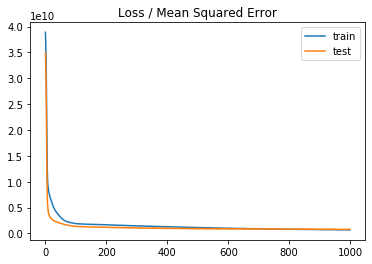

In [385]:
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [386]:
sale_price_keras = model.predict(test_new)
sub['SalePrice'] = saleprice
sub.to_csv('submission.csv',index=False)
sub.head()

,Id,SalePrice
0,1461,125742.000000
1,1462,155827.453125
2,1463,163286.953125
3,1464,199574.171875
4,1465,193937.890625
